**Run the following two cells before you begin.**

PROJECT 2_PROBLEM STATEMENT 4_DEVANSHU TYAGI

In [ ]:
%autosave 10

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [3]:
# Import the data set
df = pd.read_csv("cleaned_data.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [5]:
ATTRIBUTES_SET = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']
corr = df[ATTRIBUTES_SET].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
LIMIT_BAL,1.000000,0.027046,-0.232688,-0.111873,0.149157
SEX,0.027046,1.000000,0.014336,-0.031307,-0.088421
EDUCATION,-0.232688,0.014336,1.000000,-0.137097,0.179035
MARRIAGE,-0.111873,-0.031307,-0.137097,1.000000,-0.412828
AGE,0.149157,-0.088421,0.179035,-0.412828,1.000000


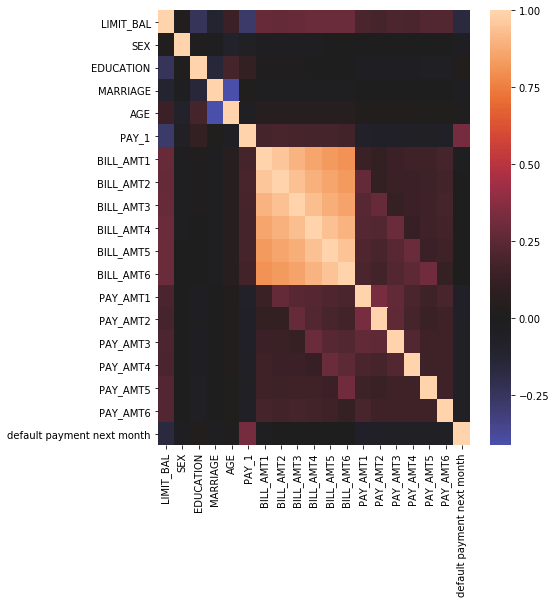

In [9]:
plt.figure(figsize = (7,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

F-TEST

In [12]:
X = df[ATTRIBUTES_SET].iloc[:,:-1].values
y = df[ATTRIBUTES_SET].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 18) (26664,)


In [13]:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, y)

In [14]:
f_test_df = pd.DataFrame({'Feature':ATTRIBUTES_SET[:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
5,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
12,PAY_AMT1,140.612679,2.358354e-32
13,PAY_AMT2,101.408321,8.256124e-24
14,PAY_AMT3,90.023873,2.542641e-21
16,PAY_AMT5,85.843295,2.090120e-20
17,PAY_AMT6,80.420784,3.219565e-19
15,PAY_AMT4,79.640021,4.774112e-19
1,SEX,42.610039,6.801534e-11
2,EDUCATION,32.637768,1.122175e-08


In [15]:
from sklearn.feature_selection import SelectPercentile
selector = SelectPercentile(f_classif, percentile=20)
selector.fit(X, y)

SelectPercentile(percentile=20,
         score_func=<function f_classif at 0x00000000143E7400>)

In [16]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False])

In [20]:
ATTRIBUTES = ATTRIBUTES_SET[:-1]

In [21]:
best_features = [ATTRIBUTES [counter] for counter in range(len(ATTRIBUTES ))
                 if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

In [22]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [23]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


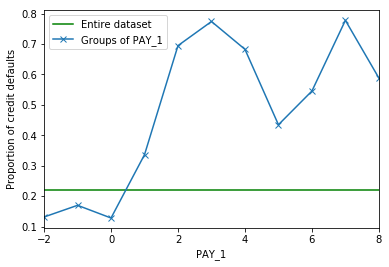

In [25]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='GREEN') 
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])

In [6]:
# Define the sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [7]:
X=np.linspace(-10,10,100)
Z= sigmoid(X)
print(X,Z)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

Text(0.5, 1.0, 'Sigmoid Function')

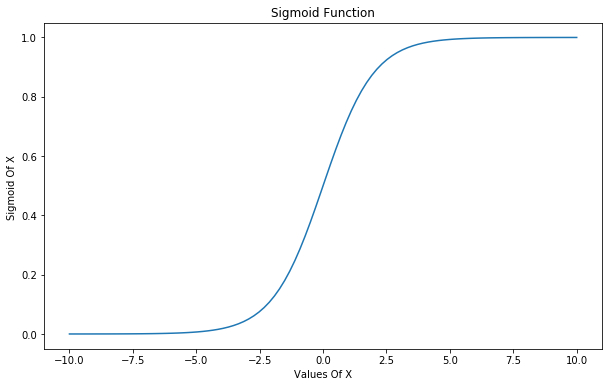

In [8]:
plt.figure(figsize=(10,6))
plt.plot(X,sigmoid(X))
plt.xlabel('Values Of X')
plt.ylabel('Sigmoid Of X ')
plt.title('Sigmoid Function')

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [31]:
ATTRIBUTES = ["PAY_1","LIMIT_BAL"]
X = df[ATTRIBUTES].values
Y = df["default payment next month"].values

In [32]:
X.shape

(26664, 2)

In [33]:
Y.shape

(26664,)

In [34]:
# Create a train/test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2 ,random_state = 2)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21331, 2)
(5333, 2)
(21331,)
(5333,)


______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [36]:
from sklearn.linear_model import LogisticRegression
LOG_REG= LogisticRegression(solver="liblinear")

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [38]:
# Fit the logistic regression model on training data
LOG_REG.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
# Make predictions using `.predict()`
y_pred = LOG_REG.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
# Find class probabilities using `.predict_proba()`
pred_prob = LOG_REG.predict_proba(X_test)
pred_prob

array([[0.69695023, 0.30304977],
       [0.94136816, 0.05863184],
       [0.80027728, 0.19972272],
       ...,
       [0.58589161, 0.41410839],
       [0.89580361, 0.10419639],
       [0.61911885, 0.38088115]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [41]:
# Add column of 1s to features
np.ones((X_test.shape[0],1))

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [44]:
np.ones((X_test.shape[0],1)).shape

(5333, 1)

In [48]:
one = np.hstack([np.ones((X_test.shape[0],1)),X_test])
one

array([[ 1.0e+00,  2.0e+00,  1.2e+05],
       [ 1.0e+00, -1.0e+00,  4.0e+05],
       [ 1.0e+00, -1.0e+00,  2.0e+05],
       ...,
       [ 1.0e+00,  0.0e+00,  5.0e+04],
       [ 1.0e+00, -2.0e+00,  3.1e+05],
       [ 1.0e+00,  0.0e+00,  7.0e+04]])

In [50]:
# Get coefficients and intercepts from trained model
print('Coefficients Of Logistic_Regression_Model',LOG_REG.coef_)
print('Intercept of Logistic_Regression_Model',LOG_REG.intercept_)
log_reg_model_coeff=LOG_REG.coef_
log_reg_model_intercept=LOG_REG.intercept_

Coefficients Of Logistic_Regression_Model [[ 8.11160706e-11 -6.94014120e-06]]
Intercept of Logistic_Regression_Model [-6.74386096e-11]


In [51]:
coeff_interc=np.concatenate([log_reg_model_intercept.reshape(1,1),log_reg_model_coeff],axis=1)
coeff_interc

array([[-6.74386096e-11,  8.11160706e-11, -6.94014120e-06]])

In [53]:
# Manually calculate predicted probabilities
cal_pred_prob=np.dot(coeff_interc,np.transpose(one))
cal_pred_prob

array([[-0.83281694, -2.77605648, -1.38802824, ..., -0.34700706,
        -2.15144377, -0.48580988]])

In [56]:
sig_cal_predprob = sigmoid(cal_pred_prob)
sig_cal_predprob

array([[0.30304977, 0.05863184, 0.19972272, ..., 0.41410839, 0.10419639,
        0.38088115]])

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [57]:
# Manually calculate predicted classes
pred_cal= sig_cal_predprob >= 0.5
pred_cal.shape

(1, 5333)

In [58]:
# Compare to scikit-learn's predicted classes
np.array_equal(pred_cal,y_pred.reshape(1,-1))

True

______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [59]:
from sklearn.metrics import roc_auc_score

In [60]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
roc_auc_score(Y_test,pred_prob[:,1])

0.6301663819054594

In [61]:
# Use manually calculated predicted probabilities to calculate ROC AUC
roc_auc_score(Y_test,cal_pred_prob.reshape(cal_pred_prob.shape[1],))

0.6301663819054594